In [1]:
import pandas as pd
import numpy as np
import os
from os.path import splitext, basename
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels

In [3]:
# Reads in the compiled dataset
dfm=pd.read_excel(r'../MeltInclusionCompilation_april23.xlsx')


In [50]:
dfm['reference_volc']=dfm["reference"]+dfm["volcano"]
dfm['CO2_Combo']=dfm['co2_glass_raw_ppm']
has_PEC_data=dfm['co2_glass_pec_ppm']>0
dfm.loc[has_PEC_data, 'CO2_Combo']=dfm['co2_glass_pec_ppm']


dfm['H2O_Combo']=dfm['h2o_raw_wt']
has_PEC_data=dfm['h2o_pec_wt']>0
dfm.loc[has_PEC_data, 'H2O_Combo']=dfm['h2o_pec_wt']

dfm['SiO2_Combo']=dfm['sio2_raw_wt']
has_PEC_data=dfm['sio2_pec_wt']>0
dfm.loc[has_PEC_data, 'SiO2_Combo']=dfm['sio2_pec_wt']

dfm['XH2O_Combo']=dfm['xh2o_fl_meash2omeasco2']
has_Raman_data=dfm['xh2o_fl_meash2oramanco2']>0
dfm.loc[has_Raman_data, 'XH2O_Combo']=dfm['xh2o_fl_meash2oramanco2']




In [25]:
dfm.head()

,Unnamed: 0,Unnamed: 1,reference,volcano,sample,host_mineral,mi_number,latitude,longitude,temperature_authors,...,satp_meash2otheorco2,xh2o_fl_meash2otheorco2,satp_diffh2omeasco2,xh2o_fl_diffh2omeasco2,satp_diffh2otheorco2,xh2o_fl_diffh2otheorco2,CO2_Combo,SiO2_Combo,reference_volc,H2O_Combo
0,Aster2016,0,Aster_2016,Lassen,BORG,NaN,5.2,40.654342,-121.224742,NaN,...,5540.0,0.149917,NaN,NaN,NaN,NaN,978.0,49.14,Aster_2016Lassen,2.0
1,Aster2016,1,Aster_2016,Lassen,BORG,NaN,19.2,40.654342,-121.224742,NaN,...,2680.0,0.182894,NaN,NaN,NaN,NaN,631.0,48.46,Aster_2016Lassen,1.7
2,Aster2016,2,Aster_2016,Lassen,BORG,NaN,19.5,40.654342,-121.224742,NaN,...,2240.0,0.172047,NaN,NaN,NaN,NaN,506.0,48.49,Aster_2016Lassen,1.5
3,Aster2016,3,Aster_2016,Lassen,BORG,NaN,19.8,40.654342,-121.224742,NaN,...,3630.0,0.128002,NaN,NaN,NaN,NaN,1322.0,49.26,Aster_2016Lassen,1.6
4,Aster2016,4,Aster_2016,Lassen,BORG,NaN,23.1,40.654342,-121.224742,NaN,...,3170.0,0.101441,NaN,NaN,NaN,NaN,722.0,50.83,Aster_2016Lassen,1.3


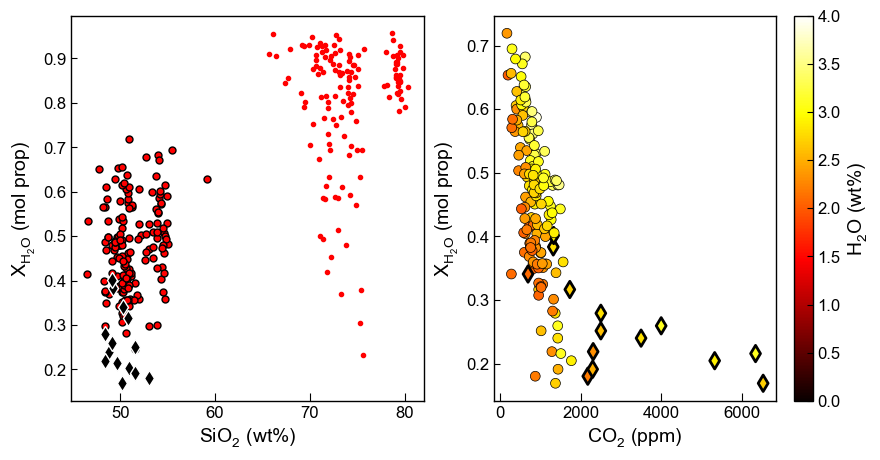

In [78]:
dfm_filter=dfm.loc[(dfm['CO2_Combo']>50)&(dfm['H2O_Combo']>2)]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
for ref in dfm['reference_volc'].unique():
    #print('reference')
    #print(ref)
    
    df_b=dfm_filter.loc[dfm_filter['reference_volc']==ref].reset_index(drop=True)
    # largest=df_b['H2O_Combo'].nlargest(3).reset_index(drop=True)
    # result1=df_b.loc[df_b['H2O_Combo']==largest[0]]
    # result2=df_b.loc[df_b['H2O_Combo']==largest[1]]
    # result3=df_b.loc[df_b['H2O_Combo']==largest[2]]
    # combo_df=pd.concat([result1, result2, result3], axis=0)
    combo_df=df_b
    combo_df2=combo_df.loc[combo_df['SiO2_Combo']<60]
    combo_df3=combo_df2.loc[combo_df2['xh2o_fl_meash2oramanco2']>0]
    ax1.plot(combo_df['SiO2_Combo'], combo_df['xh2o_fl_meash2omeasco2'], '.r')
    ax1.plot(combo_df2['SiO2_Combo'], combo_df2['xh2o_fl_meash2omeasco2'], 'ok', mfc='red', ms=5)
    ax1.plot(combo_df['SiO2_Combo'], combo_df['xh2o_fl_meash2oramanco2'], 'dk', mec='white', mfc='k', ms=8, zorder=100)
    
#     s=ax2.scatter(combo_df2['CO2_Combo'],
#                   combo_df2['H2O_Combo'],
#          marker='d', s=50, edgecolors='k', linewidths=0.5,
#             c=combo_df2['XH2O_Combo'], cmap='hot',
# vmin = 0, vmax = 0.8)

    s=ax2.scatter(combo_df2['CO2_Combo'],
                   combo_df2['XH2O_Combo'],
          marker='o', s=50, edgecolors='k', linewidths=0.5,
             c=combo_df2['H2O_Combo'], cmap='hot',
 vmin = 0, vmax = 4)
    
    s=ax2.scatter(combo_df3['co2_totalraman_pec_ppm'],
                   combo_df3['XH2O_Combo'],
          marker='d', s=70, edgecolors='k', linewidths=0.5,
             c=combo_df3['H2O_Combo'], cmap='hot',
 vmin = 0, vmax = 4, lw=2)
fig.colorbar(s, ax=ax2, label='H$_2$O (wt%)')

ax1.set_ylabel('X$_{H_{2}O}$ (mol prop)')
ax1.set_xlabel('SiO$_2$ (wt%)')
ax2.set_ylabel('X$_{H_{2}O}$ (mol prop)')
ax2.set_xlabel('CO$_2$ (ppm)')
    #print(combo_df) ()

fig.savefig('XH2O.png', dpi=200)


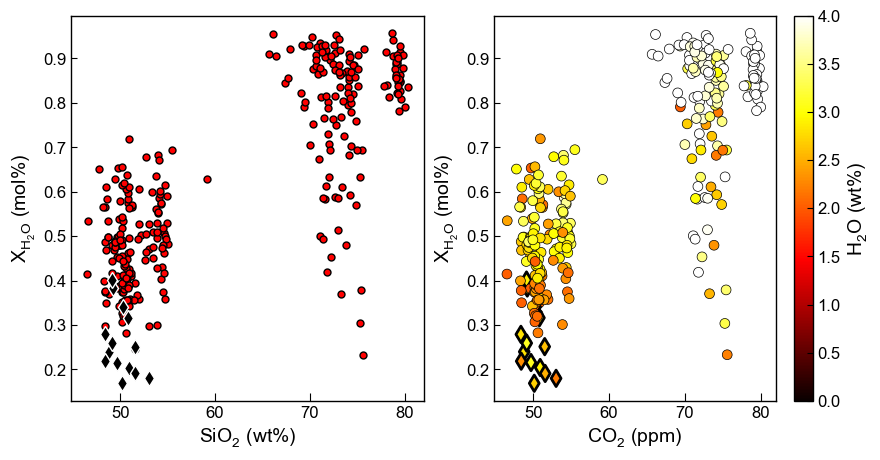

In [75]:
dfm_filter=dfm.loc[(dfm['CO2_Combo']>50)&(dfm['H2O_Combo']>2)]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
for ref in dfm['reference_volc'].unique():
    #print('reference')
    #print(ref)
    
    df_b=dfm_filter.loc[dfm_filter['reference_volc']==ref].reset_index(drop=True)
    # largest=df_b['H2O_Combo'].nlargest(3).reset_index(drop=True)
    # result1=df_b.loc[df_b['H2O_Combo']==largest[0]]
    # result2=df_b.loc[df_b['H2O_Combo']==largest[1]]
    # result3=df_b.loc[df_b['H2O_Combo']==largest[2]]
    # combo_df=pd.concat([result1, result2, result3], axis=0)
    combo_df=df_b
    combo_df2=combo_df.loc[combo_df['SiO2_Combo']<100]
    combo_df3=combo_df2.loc[combo_df2['xh2o_fl_meash2oramanco2']>0]
    ax1.plot(combo_df['SiO2_Combo'], combo_df['xh2o_fl_meash2omeasco2'], '.r')
    ax1.plot(combo_df2['SiO2_Combo'], combo_df2['xh2o_fl_meash2omeasco2'], 'ok', mfc='red', ms=5)
    ax1.plot(combo_df['SiO2_Combo'], combo_df['xh2o_fl_meash2oramanco2'], 'dk', mec='white', mfc='k', ms=8, zorder=100)
    
#     s=ax2.scatter(combo_df2['CO2_Combo'],
#                   combo_df2['H2O_Combo'],
#          marker='d', s=50, edgecolors='k', linewidths=0.5,
#             c=combo_df2['XH2O_Combo'], cmap='hot',
# vmin = 0, vmax = 0.8)

    s=ax2.scatter(combo_df2['SiO2_Combo'],
                   combo_df2['XH2O_Combo'],
          marker='o', s=50, edgecolors='k', linewidths=0.5,
             c=combo_df2['H2O_Combo'], cmap='hot',
 vmin = 0, vmax = 4)
    
    s=ax2.scatter(combo_df3['SiO2_Combo'],
                   combo_df3['XH2O_Combo'],
          marker='d', s=70, edgecolors='k', linewidths=0.5,
             c=combo_df3['H2O_Combo'], cmap='hot',
 vmin = 0, vmax = 4, lw=2)
fig.colorbar(s, ax=ax2, label='H$_2$O (wt%)')

ax1.set_ylabel('X$_{H_{2}O}$ (mol%)')
ax1.set_xlabel('SiO$_2$ (wt%)')
ax2.set_ylabel('X$_{H_{2}O}$ (mol%)')
ax2.set_xlabel('CO$_2$ (ppm)')
    #print(combo_df) ()

fig.savefig('XH2O.png', dpi=200)


In [31]:
combo_df


,Unnamed: 0,Unnamed: 1,reference,volcano,sample,host_mineral,mi_number,latitude,longitude,temperature_authors,...,satp_meash2otheorco2,xh2o_fl_meash2otheorco2,satp_diffh2omeasco2,xh2o_fl_diffh2omeasco2,satp_diffh2otheorco2,xh2o_fl_diffh2otheorco2,CO2_Combo,SiO2_Combo,reference_volc,H2O_Combo


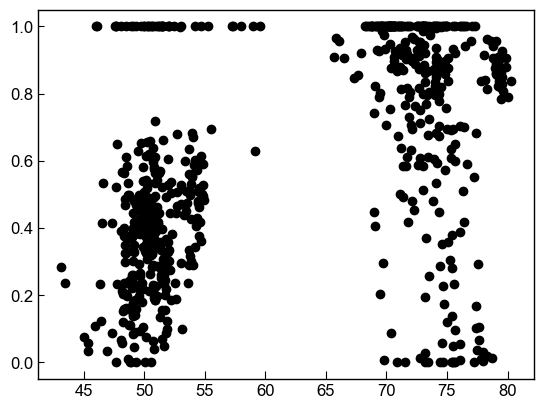

In [16]:
plt.plot(dfm['SiO2_Combo'], dfm['xh2o_fl_meash2omeasco2'], 'ok')

In [11]:
plt.plot(dfm['satp_measco2_glassmeasco2_glass']/1000, dfm['xco2_glass_fl_measco2_glassmeasco2_glass'], 'or')
plt.xlim([0, 5])
plt.xlabel('Sat P (kbar)')
plt.ylabel('XCO2_glass')

KeyError: 'satp_measco2_glassmeasco2_glass'

In [12]:
plt.plot(dfm['sio2_raw_wt'], dfm['xCO2_glass_fl_measCO2_glassmeasCO2_glass'], '.r', label='No Raman')
plt.plot(dfm['sio2_raw_wt'], dfm['xCO2_glass_fl_measCO2_glassramanCO2_glass'], '*k', label='Raman')

plt.xlim([40, 80])
plt.xlabel('SiO2')
plt.ylabel('XCO2_glass')
plt.legend()

KeyError: 'xCO2_glass_fl_measCO2_glassmeasCO2_glass'

In [74]:
plt.hist(dfm['xCO2_glass_fl_measCO2_glassmeasCO2_glass'])
plt.xlabel('XCO2_glass')

KeyError: 'xCO2_glass_fl_measCO2_glassmeasCO2_glass'

In [13]:
Baker_Lat=48.7767
Adams_Lat=46.2024
Glacier_Lat=48.1119
Rainier_Lat=46.8523

MSH_Lat=46.1914
Adams_Lat=46.2024
Hood_Lat=45.3736
Jefferson_Lat=44.6743
NorthSister_Lat=44.1662
SouthSister_Lat=44.1034
Sisters_Lat=44.13
CraterLake_Lat=42.85
Shasta_Lat=41.544
Lassen_Lat=40.654342
MedicineLake_Lat=41.6108
GVB_Lat=49.9366

[Text(40.654342, 0, 'Lassen'),
 Text(41.544, 0, 'Shasta'),
 Text(41.6108, 0, 'Medicine Lake'),
 Text(42.85, 0, 'Crater Lake'),
 Text(44.13, 0, 'Sisters'),
 Text(44.6743, 0, 'Jefferson'),
 Text(45.3736, 0, 'Hood'),
 Text(46.1914, 0, 'MSH'),
 Text(46.2024, 0, 'Adams'),
 Text(46.8523, 0, 'Rainier'),
 Text(48.1119, 0, 'Glacier'),
 Text(48.7767, 0, 'Baker')]

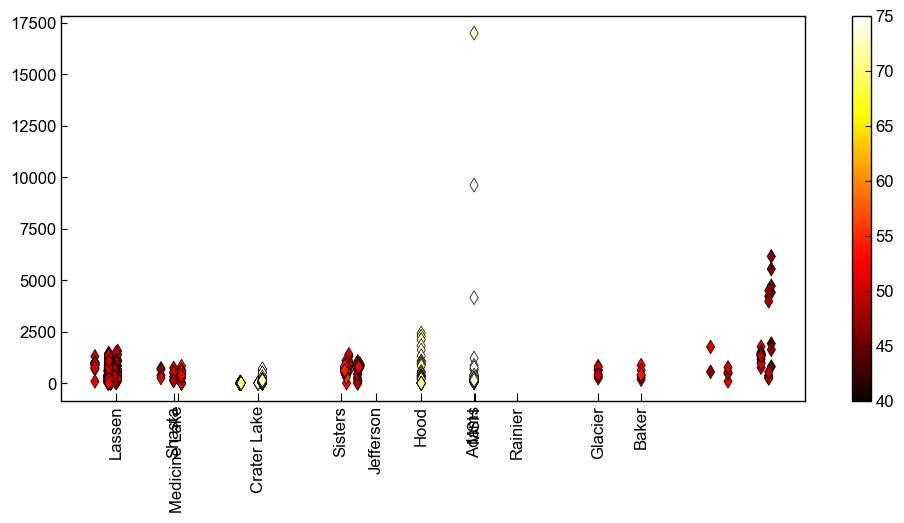

In [14]:
fig, (ax1) = plt.subplots(1, figsize=(12,5))

s=ax1.scatter(dfm['latitude'], dfm['CO2_Combo'], marker='d', s=50, edgecolors='k', linewidths=0.5,
            c=dfm['SiO2_Combo'], cmap='hot',
vmin = 40, vmax = 75)
fig.colorbar(s, ax=ax1)
#fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax1)
ax1.set_xticks([Lassen_Lat, Shasta_Lat, MedicineLake_Lat, CraterLake_Lat, Sisters_Lat, 
                Jefferson_Lat, Hood_Lat, MSH_Lat, Adams_Lat,
               Rainier_Lat, Glacier_Lat, Baker_Lat])
ax1.set_xticklabels(['Lassen', 'Shasta', 'Medicine Lake', 'Crater Lake', 'Sisters', 'Jefferson', 'Hood', 'MSH', 'Adams', 'Rainier',
                    'Glacier', 'Baker'], rotation=90)

In [77]:
dfm.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'reference', 'volcano', 'sample',
       'host_mineral', 'mi_number', 'latitude', 'longitude',
       'temperature_authors',
       ...
       'satp_meash2omeasco2', 'xh2o_fl_meash2omeasco2', 'satp_meash2oramanco2',
       'xh2o_fl_meash2oramanco2', 'satp_meash2otheorco2',
       'xh2o_fl_meash2otheorco2', 'satp_diffh2omeasco2',
       'xh2o_fl_diffh2omeasco2', 'satp_diffh2otheorco2',
       'xh2o_fl_diffh2otheorco2'],
      dtype='object', length=158)

## MAx 3 from each rounded latitude

In [11]:
dfm['volcano2']=dfm['volcano']
log_cen=dfm['volcano']=='CentralOregonMafics'
dfm.loc[log_cen, 'volcano2']=dfm['sample']
dfm['rounded_lat'] = dfm.apply(lambda row: str(round(row['latitude'], 1)) + row['volcano2'], axis=1)



In [52]:
# find le voyer ones
voyer=dfm['reference']=='LeVoyer_2010'
dfm.loc[voyer, 'rounded_lat']='41.5Shasta'

rusS=dfm['reference']=='Ruscitto_2011'
dfm.loc[rusS, 'rounded_lat']='41.5Shasta'

# find Yapoah ones 

rus=(dfm['reference']=='Ruscitto2010')&(dfm['sample'].str.contains('YAPOAH'))
dfm.loc[rus, 'rounded_lat']='44.2YAPOAH'

# Find two blue lake ones
joh_bl=(dfm['reference']=='Johnson2020')&(dfm['sample']=='Blue Lake Maar')
rus_bl=(dfm['reference']=='Ruscitto2011')&(dfm['sample']=='BL')

dfm.loc[(joh_bl|rus_bl), 'rounded_lat']='44.4BlueLake'

In [53]:
sum(rusS)

20

In [54]:
dfm['volcano'].unique()

array(['Lassen', 'Mazama', 'Mount St. Helens', 'CentralOregonMafics',
       'Mt Hood', 'Shasta', 'GlacierPeak', 'MountBaker', 'GarivaldiLake',
       'MountCayley', 'MountMeager', 'SalalGlacier', 'BridgeRiver'],
      dtype=object)

In [55]:
dfm['sample'].loc[dfm['reference']=='Ruscitto2010'].unique()

array(['Twin Craters', 'TC063Atop', 'Sand Mountain', 'PT05',
       'YAPOAH Yo061E', 'YAPOAH Yo065D', 'COLLIER',
       'GARRISON BUTTE CHAIN', 'Blue Lake Maar'], dtype=object)

In [56]:
for ref in dfm['rounded_lat'].unique():
    print('reference')
    print(ref)
    if ref==dfm['rounded_lat'].iloc[0]:
        df_b=dfm.loc[dfm['rounded_lat']==ref].reset_index(drop=True)
        largest=df_b['CO2_Combo'].nlargest(3).reset_index(drop=True)
        result1=df_b.loc[df_b['CO2_Combo']==largest[0]]
        result2=df_b.loc[df_b['CO2_Combo']==largest[1]]
        result3=df_b.loc[df_b['CO2_Combo']==largest[2]]
        combo_df=pd.concat([result1, result2], axis=0)
        combo_df_1=pd.concat([result1], axis=0)
        combo_df_2=pd.concat([result2], axis=0)
        combo_df_3=pd.concat([result3], axis=0)
    else:
        # result1 = dfm['CO2_Combo'].loc[dfm['reference']==ref].argsort()[::-1][0]
        # result2= dfm['CO2_Combo'].loc[dfm['reference']==ref].argsort()[::-1][1]
        # result3= dfm['CO2_Combo'].loc[dfm['reference']==ref].argsort()[::-1][2]
        # ref_df=dfm.loc[[result1, result2, result3]]        
        # combo_df=pd.concat([combo_df, ref_df])
        df_b=dfm.loc[dfm['rounded_lat']==ref].reset_index(drop=True)
        largest=df_b['CO2_Combo'].nlargest(3).reset_index(drop=True)
        result1=df_b.loc[df_b['CO2_Combo']==largest[0]]
        result2=df_b.loc[df_b['CO2_Combo']==largest[1]]
        #result3=df_b.loc[df_b['CO2_Combo']==largest[2]]
        if len(largest)>2:
            result3=df_b.loc[df_b['CO2_Combo']==largest[2]]
        else:
            result3=pd.DataFrame()
        ref_df=pd.concat([result1, result2], axis=0)
        combo_df_1=pd.concat([combo_df_1, result1])
        combo_df_2=pd.concat([combo_df_2, result2])
        combo_df_3=pd.concat([combo_df_3, result3])
        combo_df=pd.concat([combo_df, ref_df])

reference
40.7Lassen
reference
40.5Lassen
reference
42.9Mazama
reference
46.2Mount St. Helens
reference
44.4BL
reference
45.4Mt Hood
reference
41.5Shasta
reference
42.6Mazama
reference
44.3Twin Craters
reference
44.3TC063Atop
reference
44.4Sand Mountain
reference
44.2PT05
reference
44.2YAPOAH
reference
44.2COLLIER
reference
44.4GARRISON BUTTE CHAIN
reference
44.4Blue Lake Maar
reference
48.1GlacierPeak
reference
48.8MountBaker
reference
49.9GarivaldiLake
reference
50.1MountCayley
reference
50.6MountMeager
reference
50.8SalalGlacier
reference
50.8BridgeRiver
reference
40.6Lassen
reference
40.3Lassen


In [57]:
combo_df_1

,Unnamed: 0,Unnamed: 1,reference,volcano,sample,host_mineral,mi_number,latitude,longitude,temperature_authors,...,satp_meash2otheorco2,xh2o_fl_meash2otheorco2,satp_diffh2omeasco2,xh2o_fl_diffh2omeasco2,satp_diffh2otheorco2,xh2o_fl_diffh2otheorco2,H2O_Combo,SiO2_Combo,volcano2,rounded_lat
33,Walowski2016,91,Walowski_2016,Lassen,BORG,Olivine,A23,40.654342,-121.224742,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.340000,48.7000,Lassen,40.7Lassen
34,Quinn2014,30,Quinn_2014,Lassen,LQ13-01-mi-27-01,Quartz,LQ13-01-mi-27-01,40.524000,-121.522200,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.480000,78.6200,Lassen,40.5Lassen
101,Wright2012,91,Wright et al. 2012,Mazama,rhyodacite of bear bluff,Orthopyroxene,1748OPX5-1.1,42.916500,-122.084500,883.0,...,NaN,NaN,NaN,NaN,NaN,NaN,6.124139,75.0000,Mazama,42.9Mazama
6,Blundy2010,6,Blundy et al. 2010 EPSL,Mount St. Helens,1980-05-18 00:00:00,Plagioclase,NaN,46.191400,122.195600,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.070000,67.3600,Mount St. Helens,46.2Mount St. Helens
0,Johnson2020,0,Johnson2020,CentralOregonMafics,BL,Olivine,1Ã¢Â€Â“3_1,44.425100,-121.732900,NaN,...,4050.0,0.430915,2560.0,0.586247,4040.0,0.429837,3.851899,54.0800,BL,44.4BL
16,Koleszar2012,16,Koleszar_2012,Mt Hood,MH08-20-0210b,NaN,NaN,45.373600,121.696000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.420000,71.6412,Mt Hood,45.4Mt Hood
34,Ruscitto2011,9,Ruscitto_2011,Shasta,2S173-e1,Olivine,NaN,41.666000,-122.030000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.400000,53.9800,Shasta,41.5Shasta
41,Mandeville2010,41,Mandeville et al. 2010,Mazama,Llao rocks,nd,158#12,42.586300,-121.674300,880.0,...,NaN,NaN,NaN,NaN,NaN,NaN,6.900000,68.2400,Mazama,42.6Mazama
4,Ruscitto2010,4,Ruscitto2010,CentralOregonMafics,Twin Craters,Olivine,1g2,44.254717,121.880133,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.806016,50.7550,Twin Craters,44.3Twin Craters
1,Ruscitto2010,8,Ruscitto2010,CentralOregonMafics,TC063Atop,Olivine,1f1,44.254717,121.880133,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.420989,50.6960,TC063Atop,44.3TC063Atop


In [58]:
# dfm['reference_volc']=dfm["reference"]+dfm["volcano"]
# for ref in dfm['reference_volc'].unique():
#     print('reference')
#     print(ref)
#     if ref=="Aster_2016Lassen":
#         df_b=dfm.loc[dfm['reference_volc']==ref].reset_index(drop=True)
#         largest=df_b['CO2_Combo'].nlargest(3).reset_index(drop=True)
#         result1=df_b.loc[df_b['CO2_Combo']==largest[0]]
#         result2=df_b.loc[df_b['CO2_Combo']==largest[1]]
#         result3=df_b.loc[df_b['CO2_Combo']==largest[2]]
#         combo_df=pd.concat([result1, result2, result3], axis=0)
#     else:
#         # result1 = dfm['CO2_Combo'].loc[dfm['reference']==ref].argsort()[::-1][0]
#         # result2= dfm['CO2_Combo'].loc[dfm['reference']==ref].argsort()[::-1][1]
#         # result3= dfm['CO2_Combo'].loc[dfm['reference']==ref].argsort()[::-1][2]
#         # ref_df=dfm.loc[[result1, result2, result3]]        
#         # combo_df=pd.concat([combo_df, ref_df])
#         df_b=dfm.loc[dfm['reference_volc']==ref].reset_index(drop=True)
#         largest=df_b['CO2_Combo'].nlargest(3).reset_index(drop=True)
#         result1=df_b.loc[df_b['CO2_Combo']==largest[0]]
#         result2=df_b.loc[df_b['CO2_Combo']==largest[1]]
#         result3=df_b.loc[df_b['CO2_Combo']==largest[2]]
#         ref_df=pd.concat([result1, result2, result3], axis=0)
#         combo_df=pd.concat([combo_df, ref_df])

In [59]:
combo_df

,Unnamed: 0,Unnamed: 1,reference,volcano,sample,host_mineral,mi_number,latitude,longitude,temperature_authors,...,satp_meash2otheorco2,xh2o_fl_meash2otheorco2,satp_diffh2omeasco2,xh2o_fl_diffh2omeasco2,satp_diffh2otheorco2,xh2o_fl_diffh2otheorco2,H2O_Combo,SiO2_Combo,volcano2,rounded_lat
33,Walowski2016,91,Walowski_2016,Lassen,BORG,Olivine,A23,40.654342,-121.224742,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.340000,48.70000,Lassen,40.7Lassen
29,Walowski2016,87,Walowski_2016,Lassen,BORG,Olivine,A9,40.654342,-121.224742,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.270000,48.20000,Lassen,40.7Lassen
34,Quinn2014,30,Quinn_2014,Lassen,LQ13-01-mi-27-01,Quartz,LQ13-01-mi-27-01,40.524000,-121.522200,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.480000,78.62000,Lassen,40.5Lassen
15,Quinn2014,11,Quinn_2014,Lassen,LQ13-01-mi-11-01,Quartz,LQ13-01-mi-11-01,40.524000,-121.522200,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.450000,79.49000,Lassen,40.5Lassen
101,Wright2012,91,Wright et al. 2012,Mazama,rhyodacite of bear bluff,Orthopyroxene,1748OPX5-1.1,42.916500,-122.084500,883.0,...,NaN,NaN,NaN,NaN,NaN,NaN,6.124139,75.00000,Mazama,42.9Mazama
102,Wright2012,92,Wright et al. 2012,Mazama,rhyodacite of bear bluff,Orthopyroxene,1748OPX5-2.1,42.916500,-122.084500,883.0,...,NaN,NaN,NaN,NaN,NaN,NaN,6.075425,74.10000,Mazama,42.9Mazama
6,Blundy2010,6,Blundy et al. 2010 EPSL,Mount St. Helens,1980-05-18 00:00:00,Plagioclase,NaN,46.191400,122.195600,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.070000,67.36000,Mount St. Helens,46.2Mount St. Helens
1,Blundy2010,1,Blundy et al. 2010 EPSL,Mount St. Helens,1980-05-18 00:00:00,Plagioclase,NaN,46.191400,122.195600,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.390000,65.80000,Mount St. Helens,46.2Mount St. Helens
0,Johnson2020,0,Johnson2020,CentralOregonMafics,BL,Olivine,1Ã¢Â€Â“3_1,44.425100,-121.732900,NaN,...,4050.0,0.430915,2560.0,0.586247,4040.0,0.429837,3.851899,54.08000,BL,44.4BL
6,Johnson2020,6,Johnson2020,CentralOregonMafics,BL,Olivine,3-1_1,44.425100,-121.732900,NaN,...,2590.0,0.528126,2320.0,0.572601,2590.0,0.530417,3.578058,54.34000,BL,44.4BL


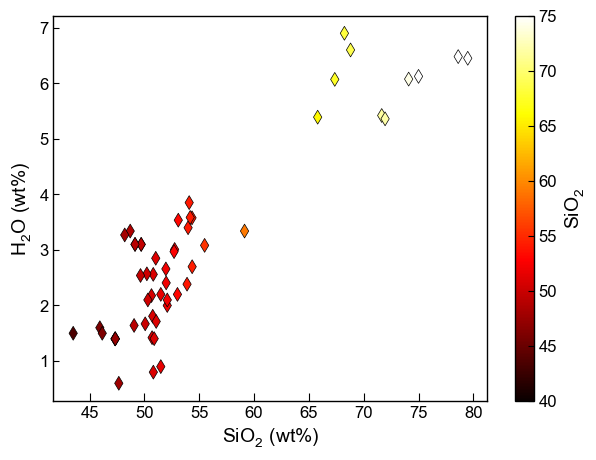

In [60]:
fig, (ax1) = plt.subplots(1, figsize=(7,5))

s=ax1.scatter(combo_df['SiO2_Combo'], combo_df['CO2_Combo'], marker='d', s=50, edgecolors='k', linewidths=0.5,
            c=combo_df['SiO2_Combo'], cmap='hot',
vmin = 40, vmax = 75)
fig.colorbar(s, ax=ax1, label='SiO$_2$')
#fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax1)#
ax1.set_xlabel('SiO$_2$ (wt%)')
ax1.set_ylabel('H$_2$O (wt%)')
fig.savefig('CO2_glass_SiO2.png', dpi=200)

In [61]:
combo_df.to_clipboard(excel=True)

In [62]:
Baker_Lat=48.7767
Adams_Lat=46.2024
Glacier_Lat=48.1119
Rainier_Lat=46.8523

MSH_Lat=46.1914
Adams_Lat=46.2024
Hood_Lat=45.3736
Jefferson_Lat=44.6743
NorthSister_Lat=44.1662
SouthSister_Lat=44.1034
Sisters_Lat=44.13
CraterLake_Lat=42.85
Shasta_Lat=41.544
Lassen_Lat=40.654342
MedicineLake_Lat=41.6108
GVB_Lat=49.9366
Newberry_Lat=43.7221
MedicineLake_offset=0.1
offset=0.05
Adams_offset=0.2

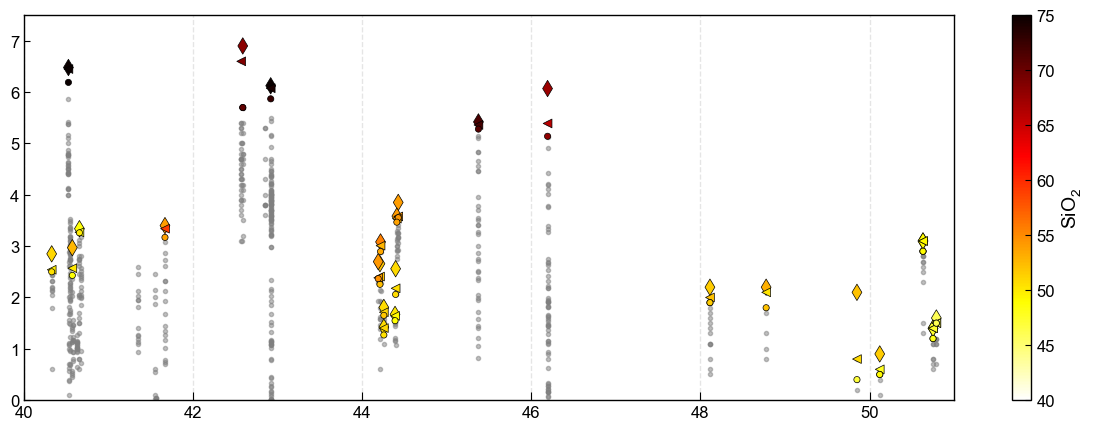

In [63]:
fig, (ax1) = plt.subplots(1, figsize=(15,5))
ax1.plot(dfm['latitude'], dfm['CO2_Combo'], 'ok', mfc='grey', mec='grey', 
         ms=3,alpha=0.5, zorder=0 
         )
s=ax1.scatter(combo_df_1['latitude'], combo_df_1['CO2_Combo'], marker='d', s=70, edgecolors='k', linewidths=0.5,
            c=combo_df_1['SiO2_Combo'], cmap='hot_r',
vmin = 40, vmax = 75, zorder=101)
s=ax1.scatter(combo_df_2['latitude'], combo_df_2['CO2_Combo'], marker='<', s=40, edgecolors='k', linewidths=0.5,
            c=combo_df_2['SiO2_Combo'], cmap='hot_r',
vmin = 40, vmax = 75, zorder=101)
s=ax1.scatter(combo_df_3['latitude'], combo_df_3['CO2_Combo'], marker='o', s=20, edgecolors='k', linewidths=0.5,
            c=combo_df_3['SiO2_Combo'], cmap='hot_r',
vmin = 40, vmax = 75, zorder=101)
fig.colorbar(s, ax=ax1, label='SiO$_2$')
#fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax1)
# ax1.set_xticks([Lassen_Lat, Shasta_Lat, MedicineLake_Lat, CraterLake_Lat, Sisters_Lat, 
#                 Jefferson_Lat, Hood_Lat, MSH_Lat, Adams_Lat,
#                Rainier_Lat, Glacier_Lat, Baker_Lat, GVB_Lat])
# ax1.set_xticklabels(['Lassen', 'Shasta', 'Medicine Lake', 'Crater Lake', 'Sisters', 'Jefferson', 'Hood', 'MSH', 'Adams', 'Rainier',
#                     'Glacier', 'Baker', 'GVB'], rotation=90)
#ax1.set_ylabel('H$_2$O (Max 3 MI per Study)')
ax1.set_xlim([40, 51])

# ax1.set_xticks([Lassen_Lat, Shasta_Lat, MedicineLake_Lat+MedicineLake_offset, CraterLake_Lat, Newberry_Lat, Sisters_Lat, 
#                 Jefferson_Lat, Hood_Lat, MSH_Lat+offset, Adams_Lat+Adams_offset+offset,
#                Rainier_Lat, Glacier_Lat, Baker_Lat])


# ax1.set_xticklabels(['Lassen', 'Shasta', 'Medicine Lake', 'Crater Lake', 'Newberry', 'Sisters', 'Jefferson', 'Hood', 'MSH', 'Adams', 'Rainier',
#                     'Glacier', 'Baker'], rotation=90)

#ax1.set_xticklabels([], rotation=90)
ax1.grid(color = 'k', linestyle = '--', axis='x',linewidth = 1, alpha = 0.1, zorder=0)
ax1.set_ylim([0, 7.5])
#ax1.set_xticks([40, 42, 44, 46, 48, 50])

fig.savefig('CO2_glass_variations.png', dpi=200, transparent=True)

In [64]:
combo_df_1.loc[combo_df_1['latitude'].between(40, 41)]

,Unnamed: 0,Unnamed: 1,reference,volcano,sample,host_mineral,mi_number,latitude,longitude,temperature_authors,...,satp_meash2otheorco2,xh2o_fl_meash2otheorco2,satp_diffh2omeasco2,xh2o_fl_diffh2omeasco2,satp_diffh2otheorco2,xh2o_fl_diffh2otheorco2,H2O_Combo,SiO2_Combo,volcano2,rounded_lat
33,Walowski2016,91,Walowski_2016,Lassen,BORG,Olivine,A23,40.654342,-121.224742,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.34,48.70,Lassen,40.7Lassen
34,Quinn2014,30,Quinn_2014,Lassen,LQ13-01-mi-27-01,Quartz,LQ13-01-mi-27-01,40.524000,-121.522200,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.48,78.62,Lassen,40.5Lassen
15,Walowski2016,31,Walowski_2016,Lassen,BRM,Olivine,6,40.570325,-121.592108,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.97,52.70,Lassen,40.6Lassen
8,Walowski2016,64,Walowski_2016,Lassen,BPPC,Olivine,13,40.326172,-121.910733,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.85,51.03,Lassen,40.3Lassen


In [50]:
combo_df_1.loc[combo_df_1['latitude'].between(41, 42)]

,Unnamed: 0,Unnamed: 1,reference,volcano,sample,host_mineral,mi_number,latitude,longitude,temperature_authors,...,satp_meash2otheorco2,xh2o_fl_meash2otheorco2,satp_diffh2omeasco2,xh2o_fl_diffh2omeasco2,satp_diffh2otheorco2,xh2o_fl_diffh2otheorco2,H2O_Combo,SiO2_Combo,volcano2,rounded_lat
22,LeVoyer2010,22,LeVoyer_2010,Shasta,samp. 95-15,Olivine,12,41.3475,-122.167,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.6,NaN,Shasta,41.5Shasta
9,Ruscitto2011,9,Ruscitto_2011,Shasta,2S173-e1,Olivine,NaN,41.6660,-122.030,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.4,53.98,Shasta,41.7Shasta


In [35]:
combo_df_2.loc[combo_df_2['latitude'].between(41, 42)]

,Unnamed: 0,Unnamed: 1,reference,volcano,sample,host_mineral,mi_number,latitude,longitude,temperature_authors,...,satp_meash2otheorco2,xh2o_fl_meash2otheorco2,satp_diffh2omeasco2,xh2o_fl_diffh2omeasco2,satp_diffh2otheorco2,xh2o_fl_diffh2otheorco2,H2O_Combo,SiO2_Combo,volcano2,rounded_lat
6,LeVoyer2010,6,LeVoyer_2010,Shasta,samp. 85-1A,Olivine,3C4,41.544,-122.279,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.46,49.87,Shasta,41.5Shasta
2,Ruscitto2011,2,Ruscitto_2011,Shasta,S173-a,Olivine,NaN,41.666,-122.030,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.34,59.13,Shasta,41.7Shasta


In [36]:
combo_df_3.loc[combo_df_3['latitude'].between(41, 42)]

,Unnamed: 0,Unnamed: 1,reference,volcano,sample,host_mineral,mi_number,latitude,longitude,temperature_authors,...,satp_meash2otheorco2,xh2o_fl_meash2otheorco2,satp_diffh2omeasco2,xh2o_fl_diffh2omeasco2,satp_diffh2otheorco2,xh2o_fl_diffh2otheorco2,H2O_Combo,SiO2_Combo,volcano2,rounded_lat
13,LeVoyer2010,13,LeVoyer_2010,Shasta,samp. 95-15,Olivine,2I2,41.3475,-122.167,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.45,46.57,Shasta,41.5Shasta
7,Ruscitto2011,7,Ruscitto_2011,Shasta,S173-f,Olivine,NaN,41.6660,-122.030,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.17,53.72,Shasta,41.7Shasta


In [15]:
dfm['CO2_Combo'].loc[dfm['reference']=="Aster_2016"]

0     2.0
1     1.7
2     1.5
3     1.6
4     1.3
5     0.8
6     1.5
7     0.8
8     0.6
9     0.1
10    1.5
11    1.1
12    0.4
Name: H2O_Combo, dtype: float64

In [16]:
largest3=df_b['CO2_Combo'].nlargest(3)
largest3

91    6.124139
92    6.075425
84    5.869876
Name: H2O_Combo, dtype: float64

In [17]:
largest=df_b['CO2_Combo'].nlargest(3).reset_index(drop=True)
print(largest)
#df_b.loc[df_b['CO2_Combo']==largest]

0    6.124139
1    6.075425
2    5.869876
Name: H2O_Combo, dtype: float64
